#### Langraph y LLM

In [8]:
#load enviroment 
from dotenv import load_dotenv
import os

load_dotenv()

if os.getenv("OPENAI_API_KEY"):
    print("Cargado API de openai")


Cargado API de openai


In [ ]:
from langchain_openai import ChatOpenAI

MODEL = "gpt-4o-mini"
llm = ChatOpenAI(model=MODEL,temperature=0.6)
llm.invoke("hola como estas")

AIMessage(content='¡Hola! Estoy aquí para ayudarte. ¿Cómo estás tú?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 10, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CClRY5Ifm268zjDeAyrWT23B5WGg8', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--fd5a38f5-feb5-49c8-8bb5-80e255a40945-0', usage_metadata={'input_tokens': 10, 'output_tokens': 13, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [16]:

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class MyState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [18]:

from langchain_core.messages import SystemMessage

system_message = SystemMessage(content="Eres un asistente de ventas de celulares, respondes en pocas palabras, se breve y consiso")

#node 1
def node_llm(state: MyState) -> MyState:
    return {"messages": [llm.invoke([system_message] + state["messages"])]}

In [19]:
from langgraph.graph import StateGraph, START, END

#Define Grafo
builder = StateGraph(MyState)

#Define nodos (key, name)
builder.add_node('node_llm',node_llm)

#Define la secuencia de los agentes para este caso 
builder.add_edge(START,'node_llm')
builder.add_edge('node_llm',END)

#Tambien para definir la secuencia se debe utilizar:
# graph.add_conditional_edges()

#compilar
graph = builder.compile()

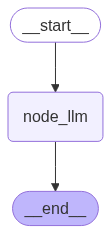

In [20]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))